In [3]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import csv
import pyproj
import pickle
import xarray as xr

Comments!!!!!!
1) Remove comparison of subset
2) Make a separate function for calculataing speed out of disp

In [4]:
# Upload Barents2.5 ataset to import full grid data 
dataset0 = xr.open_dataset("https://thredds.met.no/thredds/dodsC/fou-hi/barents_eps_eps/barents_eps_20230211T00Z.nc")

X = dataset0['X']
Y = dataset0['Y']
lon = dataset0['lon']
lat = dataset0['lat']
model_proj4 = dataset0.projection_lambert.proj4

In [91]:
#nextsim output
'''
%store -r xx_n
%store -r yy_n
%store -r cum_dx_n
%store -r cum_dy_n 

%store -r xx_n_subset
%store -r yy_n_subset
%store -r cum_dx_n_subset
%store -r cum_dy_n_subset 

#barents output
'''
#Store variables
%store -r xx_b
%store -r yy_b
%store -r cum_dx_b
%store -r cum_dy_b 
'''
%store -r xx_b_subset
%store -r yy_b_subset
%store -r cum_dx_b_subset
%store -r cum_dy_b_subset 

#full grid
%store -r X
%store -r Y
%store -r lon
%store -r lat
%store -r model_proj4

#subset grid
%store -r r
%store -r c
%store -r X_subset
%store -r Y_subset
%store -r lon_subset
%store -r lat_subset
'''
%store -r time_diff_start
%store -r time_diff_end
%store -r total_time_diff
%store -r time_period_barents
'''
# drift for the subset of overlap
%store -r upm
%store -r vpm
%store -r gpi
%store -r x1pm
%store -r y1pm
'''
# drift for teh overlap for two original safe images
%store -r upm_large
%store -r vpm_large
%store -r apm_large
%store -r rpm_large
%store -r hpm_large
%store -r lon2pm_large
%store -r lat2pm_large
%store -r lon1pm_large
%store -r lat1pm_large
%store -r gpi_large

%store -r X_large_subset
%store -r Y_large_subset
%store -r lat_large_subset
%store -r lon_large_subset

In [5]:
# Specify path with cumulative drift fields for specific par of images

barents_model_drift_path = "/home/jovyan/experiment_data/2022-2023_48h_experiment/drift_output/14_16_feb/barents_24ens_cum_disp_14-16feb.csv"
algorithm_drift_path = "/home/jovyan/experiment_data/2022-2023_48h_experiment/drift_output/14_16_feb/barents_algorithm_disp_14-16feb.csv"

##### Import model data

In [6]:
with open(barents_model_drift_path) as csvfile:
    csvreader = csv.reader(csvfile)
    # check if the file has a header row
    has_header = csv.Sniffer().has_header(csvfile.read(1024))
    csvfile.seek(0)  # reset file pointer
    #skip header row if it exists
    if has_header:
        next(csvreader)
    displacements = np.array([row for row in csvreader]).astype(float)
    cum_dx_b = displacements[:, [2]] 
    cum_dy_b = displacements[:, [3]]

In [23]:
# Reshape 1d csv data according to the grid

# Set full model grid for model data
full_model_shape = lon.shape

cum_dx_b = np.reshape(cum_dx_b, full_model_shape)
cum_dy_b = np.reshape(cum_dy_b, full_model_shape)
cum_dx_b[np.isinf(cum_dx_b)] = np.nan
cum_dy_b[np.isinf(cum_dy_b)] = np.nan

##### Calculating velocities

In [ ]:
'''
#Calculate velocities if needed
# Divide values in the first list by 2272
cum_dx_b[0] /= (3600-time_diff_start)
cum_dy_b[0] /= (3600-time_diff_start)

# Divide values in the middle lists by 3600
for i in range(1, len(cum_dx_b)-1):
    cum_dx_b[i] /= ((3600-time_diff_start) + i*3600)
    cum_dy_b[i] /= ((3600-time_diff_start) + i*3600)

# Divide values in the last list by 179
cum_dx_b[-1] /= total_time_diff
cum_dy_b[-1] /= total_time_diff

cum_dx_n[0] /= (3600-time_diff_start)
cum_dy_n[0] /= (3600-time_diff_start)

# Divide values in the middle lists by 3600
for i in range(1, len(cum_dx_b)-1):
    cum_dx_n[i] /= ((3600-time_diff_start) + i*3600)
    cum_dy_n[i] /= ((3600-time_diff_start) + i*3600)

# Divide values in the last list by 179
cum_dx_n[-1] /= total_time_diff
cum_dy_n[-1] /= total_time_diff
'''

##### Import algorithm drift data

In [12]:
with open(algorithm_drift_path) as csvfile:
    csvreader = csv.reader(csvfile)
    # check if the file has a header row
    has_header = csv.Sniffer().has_header(csvfile.read(1024))
    csvfile.seek(0)  # reset file pointer
    #skip header row if it exists
    if has_header:
        next(csvreader)
    displacements = np.array([row for row in csvreader]).astype(float)
    X_subset = displacements[:, [4]] 
    Y_subset = displacements[:, [5]]
    upm = displacements[:, [6]] 
    vpm = displacements[:, [7]]

In [14]:
# Reshape 1d csv data according to the grid

# Set subset grid for algorithm data
%store -r shape
feb1416_subset_shape = shape
print(feb1416_subset_shape)

upm = np.reshape(upm, feb1416_subset_shape)
vpm = np.reshape(vpm, feb1416_subset_shape)
upm[np.isinf(upm)] = np.nan
vpm[np.isinf(vpm)] = np.nan

(283, 219)


In [18]:
X_subset = np.reshape(X_subset, feb1416_subset_shape)
Y_subset = np.reshape(Y_subset, feb1416_subset_shape)

In [ ]:
#%store -r X_subset
#%store -r Y_subset

In [27]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.feature as cfeature

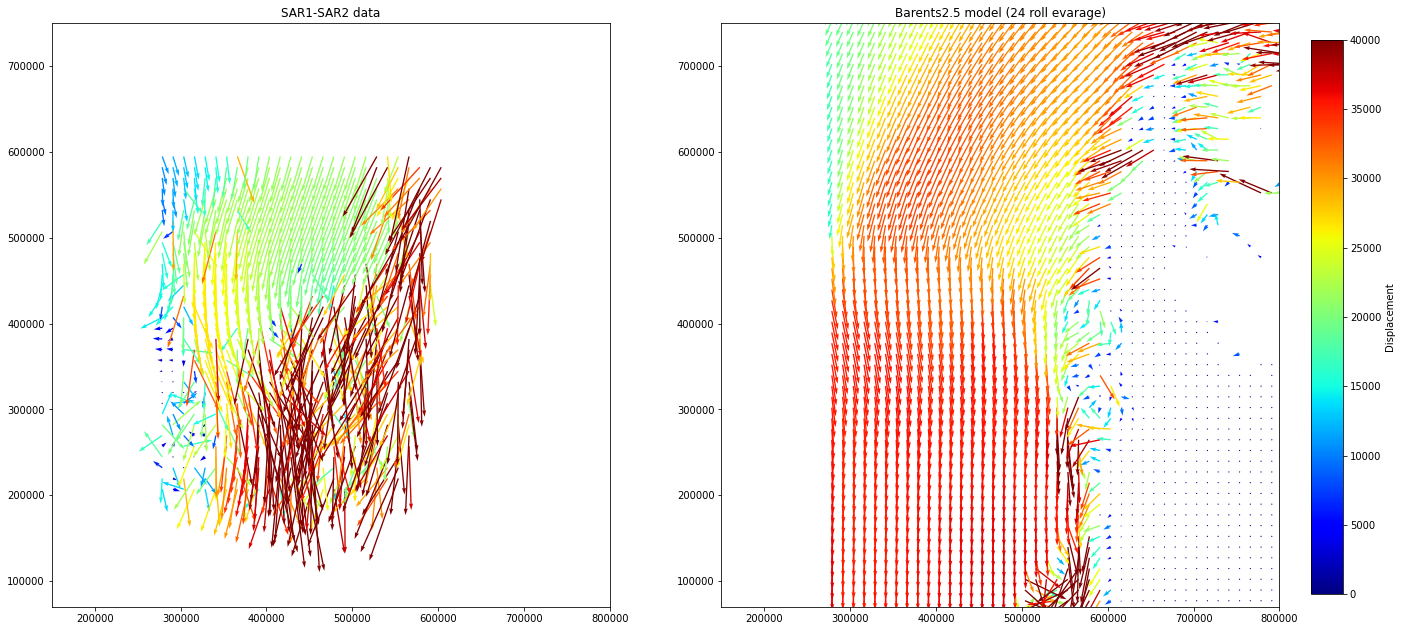

In [48]:
#Integrated drift

step = 5

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22,11))
quiver1 = ax1.quiver(X_subset[::step, ::step], Y_subset[::step, ::step], upm[::step, ::step], vpm[::step, ::step], 
                        np.hypot(upm[::step, ::step], vpm[::step, ::step]), angles='xy', scale_units='xy', scale=0.5, cmap='jet', clim=[0, 40000])
ax1.set_xlim([0.15e6, 0.8e6]) 
ax1.set_ylim([0.07e6, 0.75e6])

ax1.set_aspect('equal')

quiver2 = ax2.quiver(X[::step], Y[::step], cum_dx_b[::step, ::step], cum_dy_b[::step, ::step],
                        np.hypot(cum_dx_b[::step, ::step], cum_dy_b[::step, ::step]), angles='xy', scale_units='xy', scale=1, cmap='jet', clim=[0, 40000])

ax2.set_xlim([0.15e6, 0.8e6]) 
ax2.set_ylim([0.07e6, 0.75e6])
  
ax2.set_aspect('equal')

# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(quiver1, cax=cbar_ax)
cbar.set_label('Displacement')

ax1.set_title("SAR1-SAR2 data")
ax2.set_title("Barents2.5 model (24 roll evarage)")

plt.show()

In [ ]:
#Integrated drift

step = 5
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22,11))
quiver1 = ax1.quiver(X_subset[::step], Y_subset[::step], upm[::step, ::step], vpm[::step, ::step], 
                        np.hypot(upm[::step, ::step], vpm[::step, ::step]), angles='xy', scale_units='xy', scale=1, cmap='jet', clim=[0, 40000])
ax1.set_xlim([0.15e6, 0.9e6]) 
ax1.set_ylim([0.07e6, 0.75e6])

ax1.set_aspect('equal')

quiver2 = ax2.quiver(X[::step], Y[::step], cum_dx_b[-1][::step, ::step], cum_dy_b[-1][::step, ::step],
                        np.hypot(cum_dx_b[-1][::step, ::step], cum_dy_b[-1][::step, ::step]), angles='xy', scale_units='xy', scale=1, cmap='jet', clim=[0, 40000])

ax2.set_xlim([0.15e6, 0.9e6]) 
ax2.set_ylim([0.07e6, 0.75e6])
  
ax2.set_aspect('equal')


# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(quiver1, cax=cbar_ax)
cbar.set_label('Displacement')

ax1.set_title("SAR1-SAR2 data")
ax2.set_title("Barents2.5 model (24 roll evarage)")

plt.show()

In [95]:
%store -r minr
%store -r maxr
%store -r minc
%store -r maxc

In [96]:
X.shape, Y.shape, cum_dx_b[-1].shape

((739,), (949,), (949, 739))

In [97]:
X_large_subset = X[minc:maxc+1]
Y_large_subset = Y[minr:maxr+1]
cum_dx_b_subset = cum_dx_b[-1][minr:maxr+1,minc:maxc+1]
cum_dy_b_subset = cum_dy_b[-1][minr:maxr+1,minc:maxc+1]

In [98]:
cum_dx_b[-1].shape, cum_dx_b_subset.shape,X_large_subset.shape,Y_large_subset.shape

((949, 739), (283, 219), (219,), (283,))

In [92]:
X_large_subset.shape, Y_large_subset.shape

((219,), (283,))

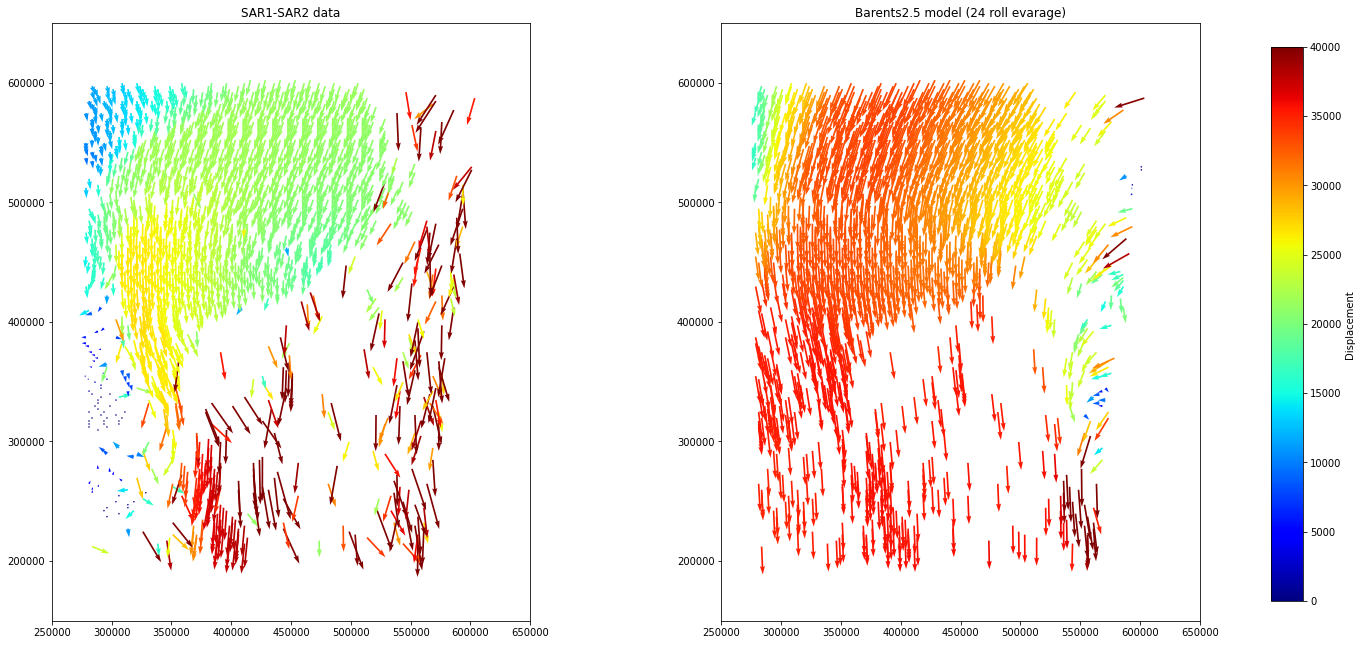

In [28]:
#HH

X_large_mesh, Y_large_mesh = np.meshgrid(X_large_subset, Y_large_subset)
X_mesh, Y_mesh = np.meshgrid(X, Y)
gpi = gpi_large


step = 5
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22,11))
quiver1 = ax1.quiver(X_large_mesh[gpi][::step], Y_large_mesh[gpi][::step], upm_large[gpi][::step], vpm_large[gpi][::step], 
                        np.hypot(upm_large[gpi][::step], vpm_large[gpi][::step]), angles='xy', scale_units='xy', scale=1.5, cmap='jet', clim=[0, 40000],width=0.0035)
ax1.set_xlim([0.25e6, 0.65e6]) 
ax1.set_ylim([0.15e6, 0.65e6])

ax1.set_aspect('equal')

quiver2 = ax2.quiver(X_large_mesh[gpi][::step], Y_large_mesh[gpi][::step], cum_dx_b_subset[gpi][::step], cum_dy_b_subset[gpi][::step],
                        np.hypot(cum_dx_b_subset[gpi][::step], cum_dy_b_subset[gpi][::step]), angles='xy', scale_units='xy', scale=1.5, cmap='jet', clim=[0, 40000],width=0.0035)

ax2.set_xlim([0.25e6, 0.65e6]) 
ax2.set_ylim([0.15e6, 0.65e6])
  
ax2.set_aspect('equal')



# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(quiver1, cax=cbar_ax)
cbar.set_label('Displacement')

ax1.set_title("SAR1-SAR2 data")
ax2.set_title("Barents2.5 model (24 roll evarage)")

plt.show()

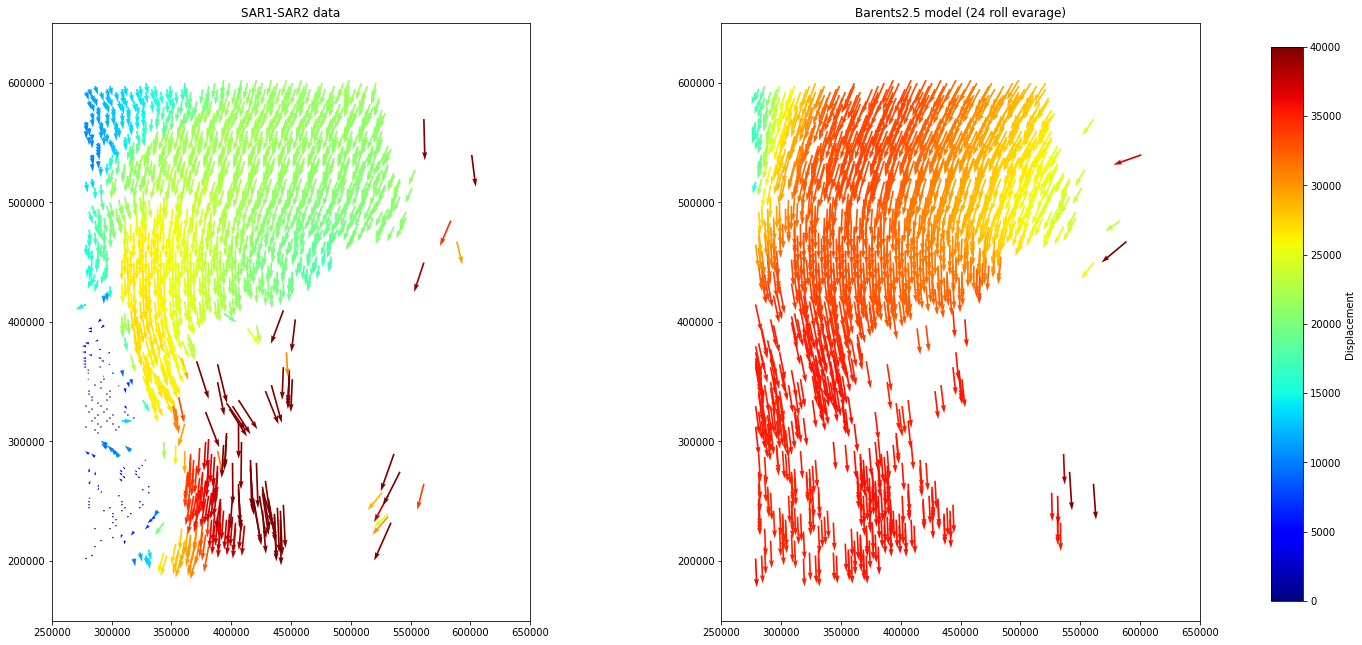

In [115]:
#HV
X_large_mesh, Y_large_mesh = np.meshgrid(X_large_subset, Y_large_subset)
X_mesh, Y_mesh = np.meshgrid(X, Y)
gpi = gpi_large


step = 5
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22,11))
quiver1 = ax1.quiver(X_large_mesh[gpi][::step], Y_large_mesh[gpi][::step], upm_large[gpi][::step], vpm_large[gpi][::step], 
                        np.hypot(upm_large[gpi][::step], vpm_large[gpi][::step]), angles='xy', scale_units='xy', scale=1.5, cmap='jet', clim=[0, 40000],width=0.0035)
ax1.set_xlim([0.25e6, 0.65e6]) 
ax1.set_ylim([0.15e6, 0.65e6])

ax1.set_aspect('equal')

quiver2 = ax2.quiver(X_large_mesh[gpi][::step], Y_large_mesh[gpi][::step], cum_dx_b_subset[gpi][::step], cum_dy_b_subset[gpi][::step],
                        np.hypot(cum_dx_b_subset[gpi][::step], cum_dy_b_subset[gpi][::step]), angles='xy', scale_units='xy', scale=1.5, cmap='jet', clim=[0, 40000],width=0.0035)

ax2.set_xlim([0.25e6, 0.65e6]) 
ax2.set_ylim([0.15e6, 0.65e6])
  
ax2.set_aspect('equal')



# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(quiver1, cax=cbar_ax)
cbar.set_label('Displacement')

ax1.set_title("SAR1-SAR2 data")
ax2.set_title("Barents2.5 model (24 roll evarage)")

plt.show()

In [110]:
dif_u.shape

(283, 219)

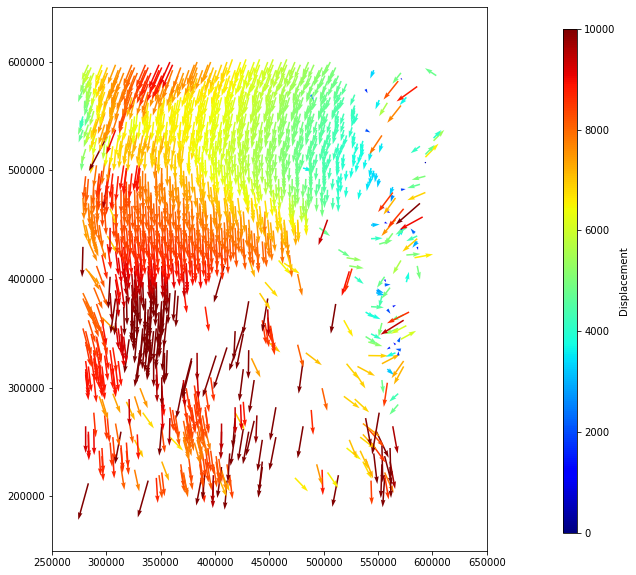

In [101]:
#HH
fig, ax = plt.subplots(figsize=(10 ,10))

dif_u = cum_dx_b_subset - upm 
dif_v = cum_dy_b_subset - vpm

quiver3 = ax.quiver(X_large_mesh[gpi][::step], Y_large_mesh[gpi][::step], dif_u[gpi][::step], dif_v[gpi][::step],
                        np.hypot(dif_u[gpi][::step], dif_v[gpi][::step]), angles='xy', scale_units='xy', scale=1.5, cmap='jet', clim=[-1000, 40000],width=0.0035)

ax.set_xlim([0.25e6, 0.65e6]) 
ax.set_ylim([0.15e6, 0.65e6])

# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(quiver1, cax=cbar_ax)
cbar.set_label('Displacement')

  
ax.set_aspect('equal')
plt.show()

In [116]:
#HV
fig, ax = plt.subplots(figsize=(10 ,10))

dif_u = cum_dx_b_subset - upm_large 
dif_v = cum_dy_b_subset - vpm_large

quiver3 = ax.quiver(X_large_mesh[gpi][::step], Y_large_mesh[gpi][::step], dif_u[gpi][::step], dif_v[gpi][::step],
                        np.hypot(dif_u[gpi][::step], dif_v[gpi][::step]), angles='xy', scale_units='xy', scale=1.5, cmap='jet', clim=[0, 40000],width=0.0035)

ax.set_xlim([0.25e6, 0.65e6]) 
ax.set_ylim([0.15e6, 0.65e6])

# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(quiver1, cax=cbar_ax)
cbar.set_label('Displacement')

  
ax.set_aspect('equal')
plt.show()

In [93]:
#Integrated drift

step = 5
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(22,11))
quiver1 = ax1.quiver(X_large_subset[::step], Y_large_subset[::step], upm_large[::step, ::step], vpm_large[::step, ::step], 
                        np.hypot(upm_large[::step, ::step], vpm_large[::step, ::step]), angles='xy', scale_units='xy', scale=0.3, cmap='jet', clim=[0, 10000])
ax1.set_xlim([0.25e6, 0.7e6]) 
ax1.set_ylim([0.1e6, 0.65e6])
ax1.set_aspect('equal')

quiver2 = ax2.quiver(X[::step], Y[::step], cum_dx_n[-1][::step, ::step], cum_dy_n[-1][::step, ::step],
                        np.hypot(cum_dx_n[-1][::step, ::step], cum_dy_n[-1][::step, ::step]), angles='xy', scale_units='xy', scale=0.3, cmap='jet', clim=[0, 10000])
ax2.set_xlim([0.25e6, 0.7e6]) 
ax2.set_ylim([0.1e6, 0.65e6])
  
ax2.set_aspect('equal')

quiver2 = ax3.quiver(X[::step], Y[::step], cum_dx_b[-1][::step, ::step], cum_dy_b[-1][::step, ::step],
                        np.hypot(cum_dx_b[-1][::step, ::step], cum_dy_b[-1][::step, ::step]), angles='xy', scale_units='xy', scale=0.3, cmap='jet', clim=[0, 10000])
ax3.set_xlim([0.25e6, 0.7e6]) 
ax3.set_ylim([0.1e6, 0.65e6])
 
ax3.set_aspect('equal')

# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(quiver1, cax=cbar_ax)
cbar.set_label('Displacement')

ax1.set_title("SAR1-SAR2 data")
ax2.set_title("Nextsim model")
ax3.set_title("Barents2.5 model (24 roll evarage)")

plt.show()

NameError: name 'cum_dx_n' is not defined

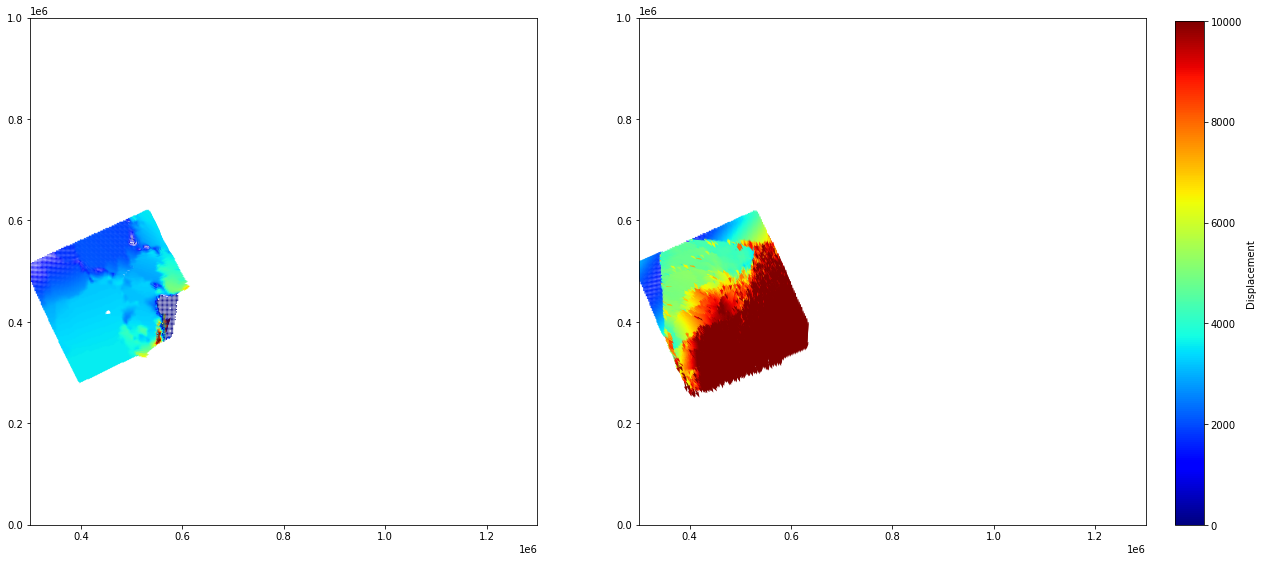

In [55]:
#Integrated drift
#Change fron ens 8 to 24 mean!
step = 1

fig, axs = plt.subplots(1,2,figsize=(20,10))
quiver1 = axs[0].quiver(X_sub_mesh[sar_mask][::step], Y_sub_mesh[sar_mask][::step], int_dx[-1][sar_mask][::step], int_dy[-1][sar_mask][::step], np.hypot(int_dx[-1][sar_mask][::step], int_dy[-1][sar_mask][::step]), angles='xy', scale_units='xy', scale=0.3, cmap='jet', clim=[0, 10000])
axs[0].set_xlim([0.3e6,1.3e6])
axs[0].set_ylim([0,1e6])
axs[0].set_aspect('equal')
axs[1].quiver(X_subset[::step], Y_subset[::step], upm[::step, ::step], vpm[::step, ::step], np.hypot(upm[::step, ::step], vpm[::step, ::step]), angles='xy', scale_units='xy', scale=0.3, cmap='jet', clim=[0, 10000])
axs[1].set_xlim([0.3e6,1.3e6])
axs[1].set_ylim([0,1e6])
axs[1].set_aspect('equal')

# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(quiver1, cax=cbar_ax)
cbar.set_label('Displacement')

plt.show()

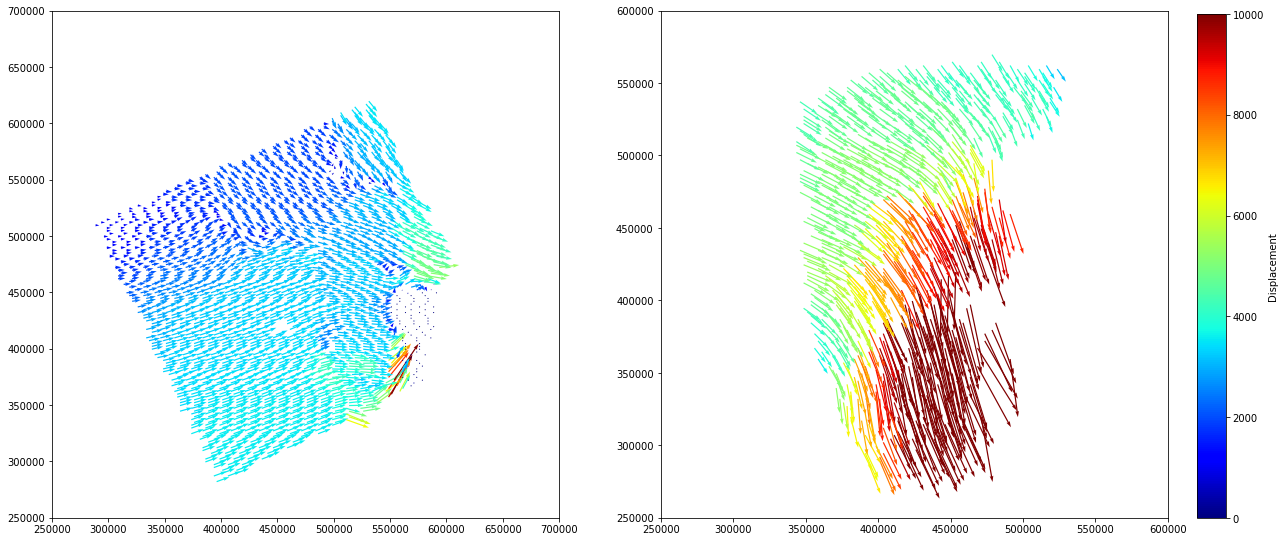

In [70]:
#Integrated drift
#Change fron ens 8 to 24 mean!
step = 5

fig, axs = plt.subplots(1,2,figsize=(20,10))
quiver1 = axs[0].quiver(X_sub_mesh[sar_mask][::step], Y_sub_mesh[sar_mask][::step], int_dx[-1][sar_mask][::step], int_dy[-1][sar_mask][::step],
                        np.hypot(int_dx[-1][sar_mask][::step], int_dy[-1][sar_mask][::step]), angles='xy', scale_units='xy', scale=0.3, cmap='jet', clim=[0, 10000])
axs[0].set_xlim([0.3e6,1.3e6])
axs[0].set_ylim([0,1e6])
axs[0].set_aspect('equal')
axs[1].quiver(X_sub_mesh[gpi][::step], Y_sub_mesh[gpi][::step], upm[gpi][::step], vpm[gpi][::step],
              np.hypot(upm[gpi][::step], vpm[gpi][::step]), angles='xy', scale_units='xy', scale=0.3, cmap='jet', clim=[0, 10000])
axs[1].set_xlim([0.3e6,1.3e6])
axs[1].set_ylim([0,1e6])
axs[1].set_aspect('equal')

# Modify the limits for axs[1] (second subplot)
axs[0].set_xlim([0.25e6, 0.7e6]) 
axs[0].set_ylim([0.25e6, 0.7e6]) 
axs[0].set_aspect('equal')


axs[1].set_xlim([0.25e6, 0.6e6])  # Adjust the x-axis limits
axs[1].set_ylim([0.25e6, 0.6e6])  # Adjust the y-axis limits
axs[1].set_aspect('equal')

# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(quiver1, cax=cbar_ax)
cbar.set_label('Displacement')

plt.show()

NameError: name 'int_dx' is not defined

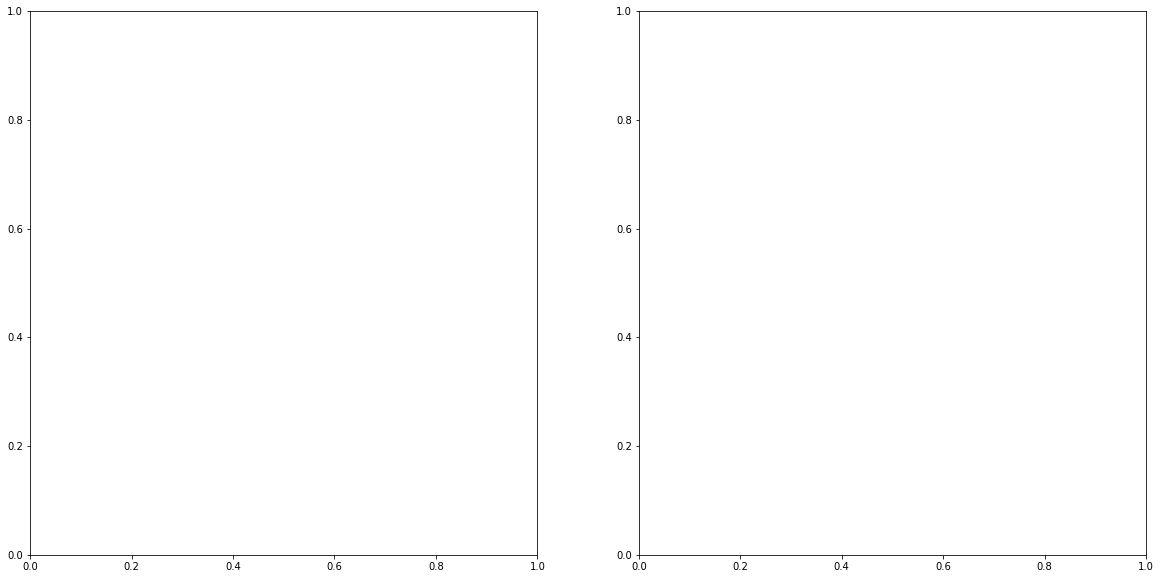

In [62]:
#Integrated drift
#Change fron ens 8 to 24 mean!
step = 5

fig, axs = plt.subplots(1,2,figsize=(20,10))
quiver1 = axs[0].quiver(X_sub_mesh[sar_mask*gpi][::step], Y_sub_mesh[sar_mask*gpi][::step], int_dx[-1][sar_mask*gpi][::step], int_dy[-1][sar_mask*gpi][::step], np.hypot(int_dx[-1][sar_mask*gpi][::step], int_dy[-1][sar_mask*gpi][::step]), angles='xy', scale_units='xy', scale=0.3, cmap='jet', clim=[0, 10000])
axs[0].set_xlim([0.3e6,1.3e6])
axs[0].set_ylim([0,1e6])
axs[0].set_aspect('equal')
axs[1].quiver(X_sub_mesh[gpi][::step], Y_sub_mesh[gpi][::step], upm[gpi][::step], vpm[gpi][::step], np.hypot(upm[gpi][::step], vpm[gpi][::step]), angles='xy', scale_units='xy', scale=0.3, cmap='jet', clim=[0, 10000])
axs[1].set_xlim([0.3e6,1.3e6])
axs[1].set_ylim([0,1e6])
axs[1].set_aspect('equal')

# Modify the limits for axs[1] (second subplot)
axs[0].set_xlim([0.25e6, 0.6e6])  # Adjust the x-axis limits
axs[0].set_ylim([0.25e6, 0.6e6])  # Adjust the y-axis limits
axs[0].set_aspect('equal')


axs[1].set_xlim([0.25e6, 0.6e6])  # Adjust the x-axis limits
axs[1].set_ylim([0.25e6, 0.6e6])  # Adjust the y-axis limits
axs[1].set_aspect('equal')

# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(quiver1, cax=cbar_ax)
cbar.set_label('Displacement')

plt.show()

In [42]:
X_sub_mesh, Y_sub_mesh = np.meshgrid(X_subset, Y_subset)

In [203]:
#Integrated drift
#Change fron ens 8 to 24 mean!
step = 5

fig, axs = plt.subplots(1,2,figsize=(20,10))
quiver1 = axs[0].quiver(b_x[::step], b_y[::step], int_dx[-1][::step, ::step], int_dy[-1][::step, ::step], np.hypot(int_dx[-1][::step, ::step], int_dy[-1][::step, ::step]), angles='xy', scale_units='xy', scale=0.3, cmap='jet', clim=[0, 10000])
axs[0].set_xlim([0.3e6,1.3e6])
axs[0].set_ylim([0,1e6])
axs[0].set_aspect('equal')
axs[1].quiver(X_sub_mesh[gpi][::step], Y_sub_mesh[gpi][::step], upm[gpi][::step], vpm[gpi][::step], np.hypot(upm[gpi][::step], vpm[gpi][::step]), angles='xy', scale_units='xy', scale=0.3, cmap='jet', clim=[0, 10000])
axs[1].set_xlim([0.3e6,1.3e6])
axs[1].set_ylim([0,1e6])
axs[1].set_aspect('equal')

# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(quiver1, cax=cbar_ax)
cbar.set_label('Displacement')

plt.show()

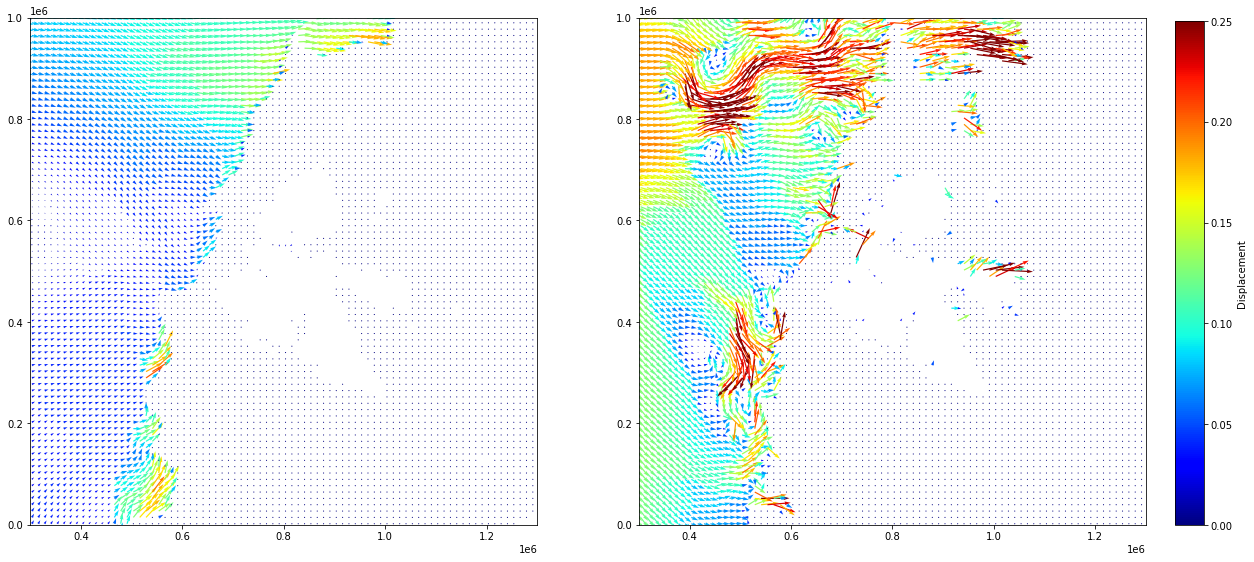

In [160]:
#Integrated drift
#Change fron ens 8 to 24 mean!
step = 5

fig, axs = plt.subplots(1,2,figsize=(20,10))
quiver1 = axs[0].quiver(b_x[::step], b_y[::step], int_dx[-1][::step, ::step], int_dy[-1][::step, ::step], np.hypot(int_dx[-1][::step, ::step], int_dy[-1][::step, ::step]), angles='xy', scale_units='xy', scale=0.000005, cmap='jet', clim=[0, 0.25])
axs[0].set_xlim([0.3e6,1.3e6])
axs[0].set_ylim([0,1e6])
axs[0].set_aspect('equal')

axs[1].quiver(b_x[::step], b_y[::step], int_dx_b[-1][::step, ::step], int_dy_b[-1][::step, ::step], np.hypot(int_dx_b[-1][::step, ::step], int_dy_b[-1][::step, ::step]), angles='xy', scale_units='xy', scale=0.000005 , cmap='jet', clim=[0, 0.25])
axs[1].set_xlim([0.3e6,1.3e6])
axs[1].set_ylim([0,1e6])
axs[1].set_aspect('equal')

# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(quiver1, cax=cbar_ax)
cbar.set_label('Displacement')

plt.show()

NameError: name 'b_x' is not defined

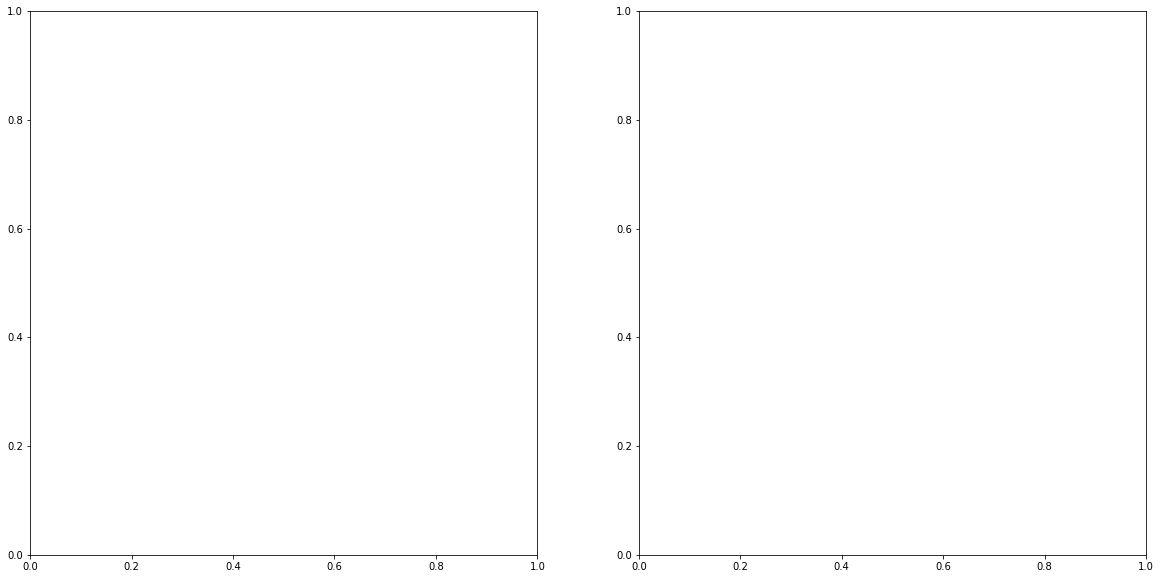

In [66]:
step = 5

fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].quiver(b_x[::step], b_y[::step], ice_u_corrected[5][::step, ::step], ice_v_corrected[5][::step, ::step], np.hypot(ice_u_corrected[5][::step, ::step], ice_v_corrected[5][::step, ::step]), angles='xy', scale_units='xy', scale=0.000005, cmap='jet', clim=[0, 0.5])
axs[0].set_xlim([0.3e6,1.3e6])
axs[0].set_ylim([0,1e6])
axs[0].set_aspect('equal')

axs[1].quiver(b_x[::step], b_y[::step], ice_u[::step, ::step], ice_v[::step, ::step], np.hypot(ice_u[::step, ::step], ice_v[::step, ::step]), angles='xy', scale_units='xy', scale=0.000005, cmap='jet', clim=[0, 0.5])
axs[1].set_xlim([0.3e6,1.3e6])
axs[1].set_ylim([0,1e6])
axs[1].set_aspect('equal')

plt.show()

ValueError: X and Y must be the same size, but X.size is 32 and Y.size is 31.

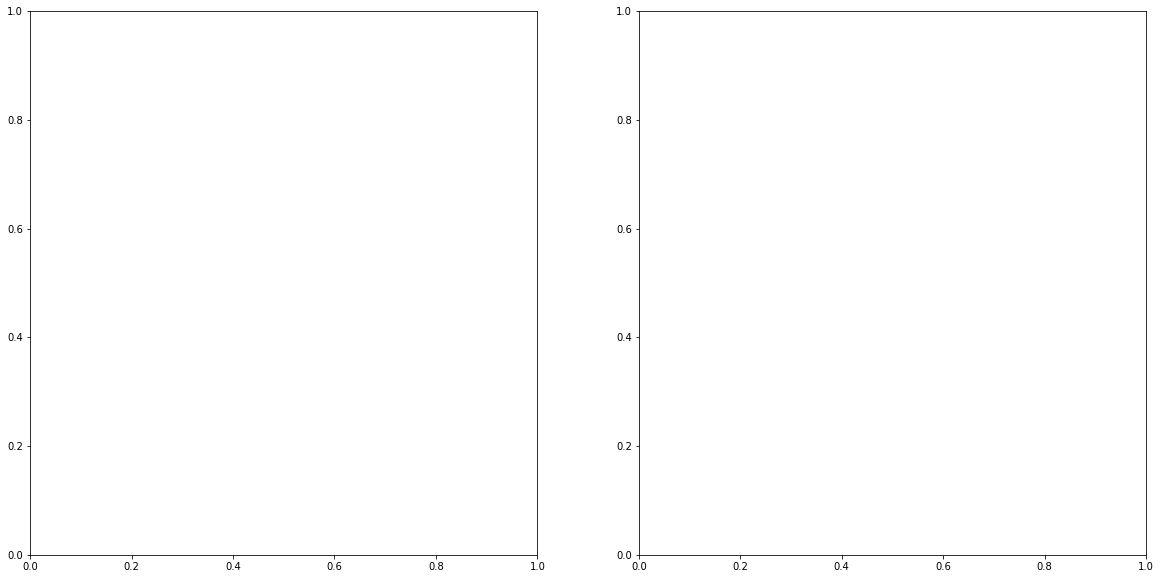

In [ ]:
step = 5

fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].quiver(X_subset[::step], Y_subset[::step], ice_u_corrected[0][::step, ::step], ice_v_corrected[0][::step, ::step], np.hypot(ice_u_corrected[0][::step, ::step], ice_v_corrected[0][::step, ::step]), angles='xy', scale_units='xy', scale=0.000005, cmap='jet', clim=[0, 0.5])
axs[0].set_xlim([0.3e6,1.3e6])
axs[0].set_ylim([0,1e6])
axs[0].set_aspect('equal')

axs[1].quiver(b_x[::step], b_y[::step], ice_u[::step, ::step], ice_v[::step, ::step], np.hypot(ice_u[::step, ::step], ice_v[::step, ::step]), angles='xy', scale_units='xy', scale=0.000005, cmap='jet', clim=[0, 0.5])
axs[1].set_xlim([0.3e6,1.3e6])
axs[1].set_ylim([0,1e6])
axs[1].set_aspect('equal')

plt.show()

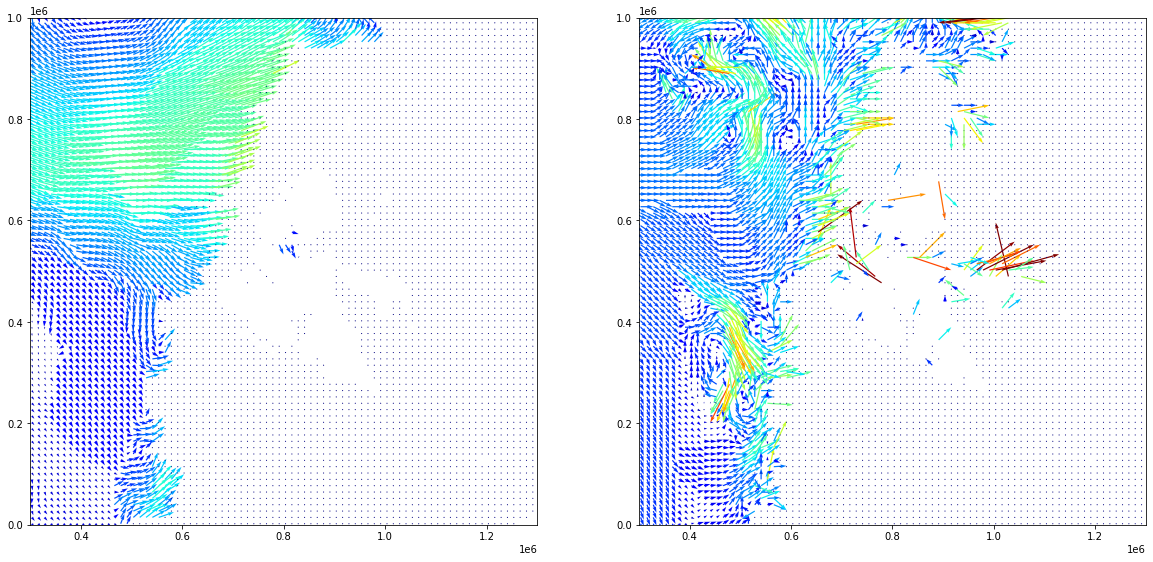

In [31]:
step = 5

fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].quiver(b_x[::step], b_y[::step], b_u[::step, ::step], b_v[::step, ::step], np.hypot(b_u[::step, ::step], b_v[::step, ::step]), angles='xy', scale_units='xy', scale=0.000005, cmap='jet', clim=[0, 0.5])
axs[0].set_xlim([0.3e6,1.3e6])
axs[0].set_ylim([0,1e6])
axs[0].set_aspect('equal')

axs[1].quiver(b_x[::step], b_y[::step], ice_u[::step, ::step], ice_v[::step, ::step], np.hypot(ice_u[::step, ::step], ice_v[::step, ::step]), angles='xy', scale_units='xy', scale=0.000005, cmap='jet', clim=[0, 0.5])
axs[1].set_xlim([0.3e6,1.3e6])
axs[1].set_ylim([0,1e6])
axs[1].set_aspect('equal')

plt.show()

In [146]:
speed_model_b = np.sqrt((ice_u**2+ice_v**2)) 

speed_model_n = np.sqrt((ice_u_corrected[25].data**2+ice_v_corrected[25].data**2))

In [147]:
speed_model_b = speed_model_b.flatten()
speed_model_n = speed_model_n.flatten()
speed_model_b.shape,speed_model_n.shape 

((701311,), (701311,))

In [148]:
speed_model_n = speed_model_n[~np.isinf(speed_model_n)]

In [149]:
#speed_model_n = speed_model_n[~np.any(np.isinf(speed_model_n), axis=1), :]
speed_model_b.shape, speed_model_n.shape

((701311,), (461315,))

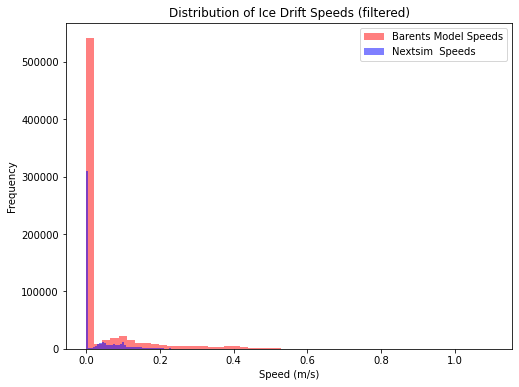

Reference Speeds:
Mean speed: 0.0493 m/s
Min speed: 0.0000 m/s
Max speed: 1.1003 m/s
95th percentile speed: 0.2772 m/s

Model Speeds:
Mean speed: 0.0493 m/s
Min speed: 0.0000 m/s
Max speed: 1.1003 m/s
95th percentile speed: 0.2772 m/s


In [150]:
plt.figure(figsize=(8,6))


# Plotting Model Speed
plt.hist(speed_model_b, bins=50, color='red', alpha=0.5, label= 'Barents Model Speeds')

# Plotting Reference Speed
plt.hist(speed_model_n, bins=50, color='blue', alpha=0.5, label='Nextsim  Speeds')

plt.xlabel('Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Ice Drift Speeds (filtered)')
plt.legend()
plt.show()

# Print statistics for reference speeds
percentile_95_ref = np.percentile(speed_model_b, 95)
mean_speed_ref = np.nanmean(speed_model_b)
min_speed_ref = np.nanmin(speed_model_b)
max_speed_ref = np.nanmax(speed_model_b)

print(f"Reference Speeds:")
print(f"Mean speed: {mean_speed_ref:.4f} m/s")
print(f"Min speed: {min_speed_ref:.4f} m/s")
print(f"Max speed: {max_speed_ref:.4f} m/s")
print(f"95th percentile speed: {percentile_95_ref:.4f} m/s")

# Print statistics for model speeds
percentile_95_model = np.percentile(speed_model_b, 95)
mean_speed_model = np.nanmean(speed_model_b)
min_speed_model = np.nanmin(speed_model_b)
max_speed_model = np.nanmax(speed_model_b)

print("\nModel Speeds:")
print(f"Mean speed: {mean_speed_model:.4f} m/s")
print(f"Min speed: {min_speed_model:.4f} m/s")
print(f"Max speed: {max_speed_model:.4f} m/s")
print(f"95th percentile speed: {percentile_95_model:.4f} m/s")


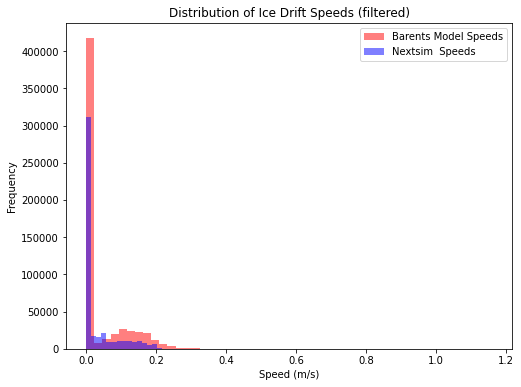

Reference Speeds:
Mean speed: 0.0373 m/s
Min speed: 0.0000 m/s
Max speed: 1.1602 m/s
95th percentile speed: nan m/s

Model Speeds:
Mean speed: 0.0373 m/s
Min speed: 0.0000 m/s
Max speed: 1.1602 m/s
95th percentile speed: nan m/s


In [163]:
speed_model_b = np.sqrt(( int_dx_b[-1]**2+ int_dy_b[-1]**2)) 
speed_model_n = np.sqrt((int_dx[-1]**2+int_dx[-1]**2))

speed_model_b = speed_model_b.flatten()
speed_model_n = speed_model_n.flatten()


plt.figure(figsize=(8,6))


# Plotting Model Speed
plt.hist(speed_model_b, bins=50, color='red', alpha=0.5, label= 'Barents Model Speeds')

# Plotting Reference Speed
plt.hist(speed_model_n, bins=50, color='blue', alpha=0.5, label='Nextsim  Speeds')

plt.xlabel('Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Ice Drift Speeds (filtered)')
plt.legend()
plt.show()

# Print statistics for reference speeds
percentile_95_ref = np.percentile(speed_model_b, 95)
mean_speed_ref = np.nanmean(speed_model_b)
min_speed_ref = np.nanmin(speed_model_b)
max_speed_ref = np.nanmax(speed_model_b)

print(f"Reference Speeds:")
print(f"Mean speed: {mean_speed_ref:.4f} m/s")
print(f"Min speed: {min_speed_ref:.4f} m/s")
print(f"Max speed: {max_speed_ref:.4f} m/s")
print(f"95th percentile speed: {percentile_95_ref:.4f} m/s")

# Print statistics for model speeds
percentile_95_model = np.percentile(speed_model_b, 95)
mean_speed_model = np.nanmean(speed_model_b)
min_speed_model = np.nanmin(speed_model_b)
max_speed_model = np.nanmax(speed_model_b)

print("\nModel Speeds:")
print(f"Mean speed: {mean_speed_model:.4f} m/s")
print(f"Min speed: {min_speed_model:.4f} m/s")
print(f"Max speed: {max_speed_model:.4f} m/s")
print(f"95th percentile speed: {percentile_95_model:.4f} m/s")


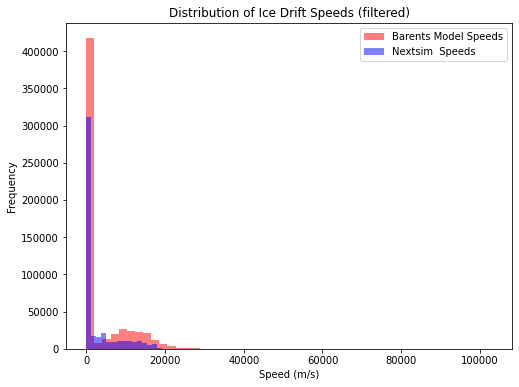

Reference Speeds:
Mean speed: 3310.8077 m/s
Min speed: 0.0000 m/s
Max speed: 103085.5450 m/s
95th percentile speed: nan m/s

Model Speeds:
Mean speed: 3310.8077 m/s
Min speed: 0.0000 m/s
Max speed: 103085.5450 m/s
95th percentile speed: nan m/s


In [169]:
speed_model_b = np.sqrt(( int_dx_b[-1]**2+ int_dy_b[-1]**2)) 
speed_model_n = np.sqrt((int_dx[-1]**2+int_dx[-1]**2))

speed_model_b = speed_model_b.flatten()
speed_model_n = speed_model_n.flatten()


plt.figure(figsize=(8,6))


# Plotting Model Speed
plt.hist(speed_model_b, bins=50, color='red', alpha=0.5, label= 'Barents Model Speeds')

# Plotting Reference Speed
plt.hist(speed_model_n, bins=50, color='blue', alpha=0.5, label='Nextsim  Speeds')

plt.xlabel('Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Ice Drift Speeds (filtered)')
plt.legend()
plt.show()

# Print statistics for reference speeds
percentile_95_ref = np.percentile(speed_model_b, 95)
mean_speed_ref = np.nanmean(speed_model_b)
min_speed_ref = np.nanmin(speed_model_b)
max_speed_ref = np.nanmax(speed_model_b)

print(f"Reference Speeds:")
print(f"Mean speed: {mean_speed_ref:.4f} m/s")
print(f"Min speed: {min_speed_ref:.4f} m/s")
print(f"Max speed: {max_speed_ref:.4f} m/s")
print(f"95th percentile speed: {percentile_95_ref:.4f} m/s")

# Print statistics for model speeds
percentile_95_model = np.percentile(speed_model_b, 95)
mean_speed_model = np.nanmean(speed_model_b)
min_speed_model = np.nanmin(speed_model_b)
max_speed_model = np.nanmax(speed_model_b)

print("\nModel Speeds:")
print(f"Mean speed: {mean_speed_model:.4f} m/s")
print(f"Min speed: {min_speed_model:.4f} m/s")
print(f"Max speed: {max_speed_model:.4f} m/s")
print(f"95th percentile speed: {percentile_95_model:.4f} m/s")


In [232]:
speed_model_b.shape, speed_model_n.shape

((24640,), (24640,))

In [236]:
speed_model_b.shape, speed_model_n.shape

((4043,), (4043,))

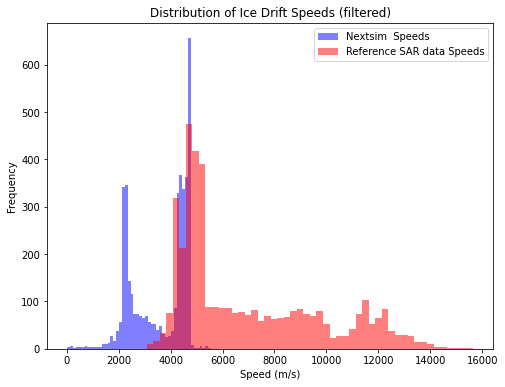

Reference Speeds:
Mean speed: 6932.7848 m/s
Min speed: 3080.6269 m/s
Max speed: 15655.2723 m/s
95th percentile speed: 12337.5081 m/s

Model Speeds:
Mean speed: 6932.7848 m/s
Min speed: 3080.6269 m/s
Max speed: 15655.2723 m/s
95th percentile speed: 12337.5081 m/s


In [235]:
speed_model_b = np.sqrt(( upm[gpi]**2+ vpm[gpi]**2)) 
speed_model_n = np.sqrt((int_dx[-1][gpi]**2+int_dx[-1][gpi]**2))
#speed_model_b = np.sqrt(( upm**2+ vpm**2)) 
#speed_model_n = np.sqrt((int_dx[-1]**2+int_dx[-1]**2))

speed_model_b = speed_model_b.flatten()
speed_model_n = speed_model_n.flatten()


plt.figure(figsize=(8,6))




# Plotting Reference Speed
#speed_model_n_clipped = np.clip(speed_model_n, 1000, 60000)
plt.hist(speed_model_n, bins=50, color='blue', alpha=0.5, label='Nextsim  Speeds')


# Plotting Model Speed
plt.hist(speed_model_b, bins=50, color='red', alpha=0.5, label= 'Reference SAR data Speeds')

plt.xlabel('Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Ice Drift Speeds (filtered)')
plt.legend()
plt.show()

# Print statistics for reference speeds
percentile_95_ref = np.percentile(speed_model_b, 95)
mean_speed_ref = np.nanmean(speed_model_b)
min_speed_ref = np.nanmin(speed_model_b)
max_speed_ref = np.nanmax(speed_model_b)

print(f"Reference Speeds:")
print(f"Mean speed: {mean_speed_ref:.4f} m/s")
print(f"Min speed: {min_speed_ref:.4f} m/s")
print(f"Max speed: {max_speed_ref:.4f} m/s")
print(f"95th percentile speed: {percentile_95_ref:.4f} m/s")

# Print statistics for model speeds
percentile_95_model = np.percentile(speed_model_b, 95)
mean_speed_model = np.nanmean(speed_model_b)
min_speed_model = np.nanmin(speed_model_b)
max_speed_model = np.nanmax(speed_model_b)

print("\nModel Speeds:")
print(f"Mean speed: {mean_speed_model:.4f} m/s")
print(f"Min speed: {min_speed_model:.4f} m/s")
print(f"Max speed: {max_speed_model:.4f} m/s")
print(f"95th percentile speed: {percentile_95_model:.4f} m/s")


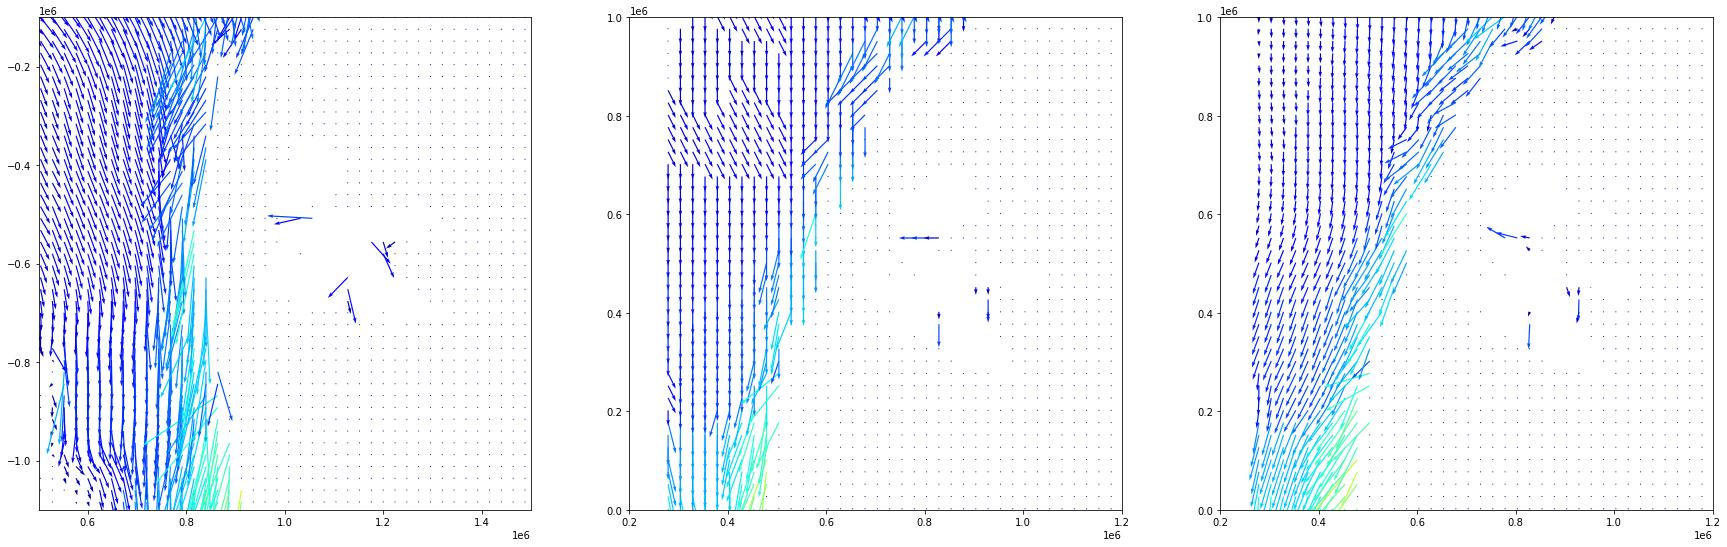

In [7]:
# JUST FOR COMPARISON WITH ANOTHER GRID

with Dataset('/data1/antonk/tmp/Moorings_barents.nc') as ds:
    n_u = ds['siu'][23]
    n_v = ds['siv'][23]

with Dataset('/data1/antonk/tmp/Moorings_2022d305.nc') as ds:
    t_u = ds['siu'][47]
    t_v = ds['siv'][47]

with Dataset('/Data/sim/data/nextsim_output_grids/topaz6_grid.nc') as ds:
    t_x = ds['x'][:] * 100000
    t_y = ds['y'][:] * 100000

b_u, b_v = correct_vectors(n_u, n_v, lon0, lat0, b_x, b_y)    
    
fig, axs = plt.subplots(1,3,figsize=(30,10))
step = 8
#axs[0].pcolormesh(m1x[::step], m1y[::step], , cmap='jet', vmin=0, vmax=0.1)
axs[0].quiver(t_x[::step], t_y[::step], t_u[::step, ::step], t_v[::step, ::step], np.hypot(t_u[::step, ::step], t_v[::step, ::step]), angles='xy', scale_units='xy', scale=0.000001, cmap='jet', clim=[0, 0.5])
axs[0].set_xlim([0.5e6,1.5e6])
axs[0].set_ylim([-1.1e6,-0.1e6])
axs[0].set_aspect('equal')

step = 10
#axs[1].pcolormesh(m2x[::step], m2y[::step],  cmap='jet', vmin=0, vmax=0.1)
axs[1].quiver(b_x[::step], b_y[::step], n_u[::step, ::step], n_v[::step, ::step], np.hypot(n_u[::step, ::step], n_v[::step, ::step]), angles='xy', scale_units='xy', scale=0.000002, cmap='jet', clim=[0, 0.5])
axs[1].set_xlim([0.2e6,1.2e6])
axs[1].set_ylim([0,1e6])
axs[1].set_aspect('equal')

#axs[2].pcolormesh(m2x[::step], m2y[::step], cmap='jet', vmin=0, vmax=0.1)
axs[2].quiver(b_x[::step], b_y[::step], b_u[::step, ::step], b_v[::step, ::step], np.hypot(b_u[::step, ::step], b_v[::step, ::step]), angles='xy', scale_units='xy', scale=0.000002, cmap='jet', clim=[0, 0.5])
axs[2].set_xlim([0.2e6,1.2e6])
axs[2].set_ylim([0,1e6])
axs[2].set_aspect('equal')

plt.show()

In [39]:
# Preparing masks

# GPI with h < some value
%store -r gpi_1416_02

%store -r min_row
%store -r max_row
%store -r min_col
%store -r max_col

In [42]:
# Extract model data within the SAR subset
cum_dx_b_subset = cum_dx_b[min_row:max_row+1, min_col:max_col+1]
cum_dy_b_subset = cum_dy_b[min_row:max_row+1, min_col:max_col+1]

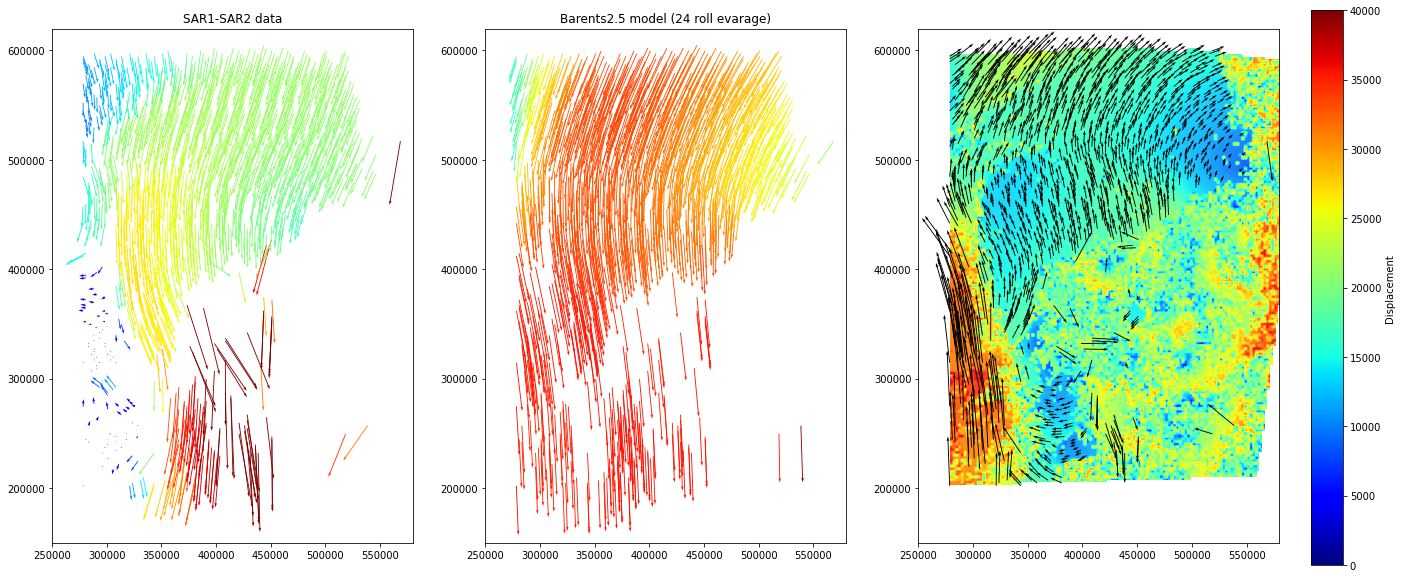

In [358]:
#Integrated drift filtered with gpi

disp_dif_x = upm - cum_dx_b_subset
disp_dif_y = vpm - cum_dy_b_subset
disp_dif = np.sqrt(( disp_dif_x**2+ disp_dif_y**2)) 
masked_disp_dif = np.full_like(disp_dif, np.nan)
masked_disp_dif[gpi_1416_02] = disp_dif[gpi_1416_02]

step = 6

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(22,11))
quiver1 = ax1.quiver(X_subset[gpi_1416_02][::step], Y_subset[gpi_1416_02][::step], upm[gpi_1416_02][::step], vpm[gpi_1416_02][::step], 
                        np.hypot(upm[gpi_1416_02][::step], vpm[gpi_1416_02][::step]), angles='xy', scale_units='xy', scale=0.80, cmap='jet', clim=[0, 40000])
ax1.set_xlim([0.25e6, 0.58e6]) 
ax1.set_ylim([0.15e6, 0.62e6])

ax1.set_aspect('equal')

quiver2 = ax2.quiver(X_subset[gpi_1416_02][::step], Y_subset[gpi_1416_02][::step], cum_dx_b_subset[gpi_1416_02][::step], cum_dy_b_subset[gpi_1416_02][::step],
                        np.hypot(cum_dx_b_subset[gpi_1416_02][::step], cum_dy_b_subset[gpi_1416_02][::step]), angles='xy', scale_units='xy', scale=0.8, cmap='jet', clim=[0, 40000])

ax2.set_xlim([0.25e6, 0.58e6]) 
ax2.set_ylim([0.15e6, 0.62e6])
  
ax2.set_aspect('equal')

# Choose one of three ways to show difference:
# 0) Difference vectors
#quiver = ax3.quiver(X_subset[gpi_1416_02][::step], Y_subset[gpi_1416_02][::step], disp_dif_x[gpi_1416_02][::step], disp_dif_y[gpi_1416_02][::step], 
#                        np.hypot(disp_dif_x[gpi_1416_02][::step], disp_dif_y[gpi_1416_02][::step]), angles='xy', scale_units='xy', scale=0.8, cmap='jet', clim=[0, 40000])
# 1) Difference vectors without gradient (to combine with the raster)
quiver = ax3.quiver(X_subset[gpi_1416_02][::step], Y_subset[gpi_1416_02][::step], disp_dif_x[gpi_1416_02][::step], disp_dif_y[gpi_1416_02][::step], 
                        angles='xy', scale_units='xy', scale=0.8, cmap='Greys', clim=[0, 40000], width=0.0025)
# 2) Difference raster masked with gpi
#ax3.imshow(masked_disp_dif, cmap='jet', norm=PowerNorm(gamma=0.5), origin='lower', extent=[X_subset.min(), X_subset.max(), Y_subset.min(), Y_subset.max()], alpha=1)
# 3) Total difference raster
ax3.imshow(disp_dif, cmap='jet', norm=PowerNorm(gamma=0.5), origin='lower', extent=[X_subset.min(), X_subset.max(), Y_subset.min(), Y_subset.max()], alpha=0.9)


ax3.set_xlim([0.25e6, 0.58e6]) 
ax3.set_ylim([0.15e6, 0.62e6])

ax3.set_aspect('equal')

# Create a colorbar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(quiver1, cax=cbar_ax)
cbar.set_label('Displacement')

ax1.set_title("SAR1-SAR2 data")
ax2.set_title("Barents2.5 model (24 roll evarage)")

plt.show()

In [68]:
disp_model_b = np.sqrt(( cum_dx_b_subset**2+ cum_dy_b_subset**2)) 
disp_alg = np.sqrt((upm**2+vpm**2))
disp_model_b = disp_model_b[gpi_1416_02].flatten()
disp_alg = disp_alg[gpi_1416_02].flatten()
disp_model_b.shape, disp_alg.shape
disp_model_b = np.sqrt(( cum_dx_b_subset**2+ cum_dy_b_subset**2)) 
disp_alg = np.sqrt((upm**2+vpm**2))
disp_model_b = disp_model_b.flatten()
disp_alg = disp_alg.flatten()
disp_model_b.shape, disp_alg.shape

((61977,), (61977,))

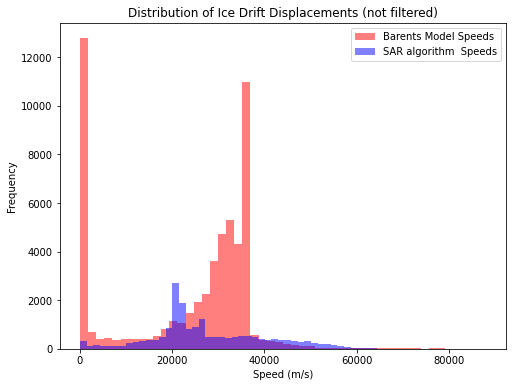

'\n# Print statistics for reference speeds\npercentile_95_ref = np.percentile(speed_model_b, 95)\nmean_speed_ref = np.nanmean(speed_model_b)\nmin_speed_ref = np.nanmin(speed_model_b)\nmax_speed_ref = np.nanmax(speed_model_b)\n\nprint(f"Reference Speeds:")\nprint(f"Mean speed: {mean_speed_ref:.4f} m/s")\nprint(f"Min speed: {min_speed_ref:.4f} m/s")\nprint(f"Max speed: {max_speed_ref:.4f} m/s")\nprint(f"95th percentile speed: {percentile_95_ref:.4f} m/s")\n\n# Print statistics for model speeds\npercentile_95_model = np.percentile(speed_model_b, 95)\nmean_speed_model = np.nanmean(speed_model_b)\nmin_speed_model = np.nanmin(speed_model_b)\nmax_speed_model = np.nanmax(speed_model_b)\n\nprint("\nModel Speeds:")\nprint(f"Mean speed: {mean_speed_model:.4f} m/s")\nprint(f"Min speed: {min_speed_model:.4f} m/s")\nprint(f"Max speed: {max_speed_model:.4f} m/s")\nprint(f"95th percentile speed: {percentile_95_model:.4f} m/s")\n'

In [71]:
disp_model_b = np.sqrt(( cum_dx_b_subset**2+ cum_dy_b_subset**2)) 
disp_alg = np.sqrt((upm**2+vpm**2))

disp_model_b = disp_model_b.flatten()
disp_alg = disp_alg.flatten()


plt.figure(figsize=(8,6))


# Plotting Model Speed
plt.hist(disp_model_b, bins=50, color='red', alpha=0.5, label= 'Barents Model Speeds')

# Plotting Reference Speed
plt.hist(disp_alg, bins=50, color='blue', alpha=0.5, label='SAR algorithm  Speeds')

plt.xlabel('Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Ice Drift Displacements (not filtered)')
plt.legend()
plt.show()



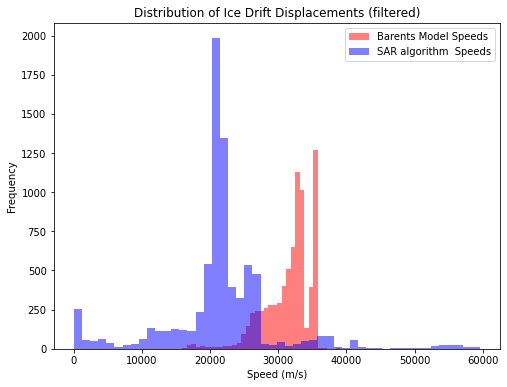

Reference Speeds:
Mean speed: 21492.1088 m/s
Min speed: 0.0000 m/s
Max speed: 59552.9003 m/s
95th percentile speed: 36040.2014 m/s

Model Speeds:
Mean speed: 31543.5854 m/s
Min speed: 15262.6694 m/s
Max speed: 48354.7660 m/s
95th percentile speed: 35562.3022 m/s


In [72]:
disp_model_b = np.sqrt(( cum_dx_b_subset**2+ cum_dy_b_subset**2)) 
disp_alg = np.sqrt((upm**2+vpm**2))

disp_model_b = disp_model_b[gpi_1416_02].flatten()
disp_alg = disp_alg[gpi_1416_02].flatten()


plt.figure(figsize=(8,6))


# Plotting Model Speed
plt.hist(disp_model_b, bins=50, color='red', alpha=0.5, label= 'Barents Model Speeds')

# Plotting Reference Speed
plt.hist(disp_alg, bins=50, color='blue', alpha=0.5, label='SAR algorithm  Speeds')

plt.xlabel('Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Ice Drift Displacements (filtered)')
plt.legend()
plt.show()


# Print statistics for reference speeds
percentile_95_ref = np.percentile(disp_alg, 95)
mean_speed_ref = np.nanmean(disp_alg)
min_speed_ref = np.nanmin(disp_alg)
max_speed_ref = np.nanmax(disp_alg)

print(f"Reference Speeds:")
print(f"Mean speed: {mean_speed_ref:.4f} m/s")
print(f"Min speed: {min_speed_ref:.4f} m/s")
print(f"Max speed: {max_speed_ref:.4f} m/s")
print(f"95th percentile speed: {percentile_95_ref:.4f} m/s")

# Print statistics for model speeds
percentile_95_model = np.percentile(disp_model_b, 95)
mean_speed_model = np.nanmean(disp_model_b)
min_speed_model = np.nanmin(disp_model_b)
max_speed_model = np.nanmax(disp_model_b)

print("\nModel Speeds:")
print(f"Mean speed: {mean_speed_model:.4f} m/s")
print(f"Min speed: {min_speed_model:.4f} m/s")
print(f"Max speed: {max_speed_model:.4f} m/s")
print(f"95th percentile speed: {percentile_95_model:.4f} m/s")


In [97]:
def angle_between_vector_fields(A, B, epsilon=1e-10):
    # Compute the dot product for each vector pair
    dot_product = np.sum(A * B, axis=0)
    
    # Compute the magnitudes of each vector in the fields
    magnitude_A = np.linalg.norm(A, axis=0)
    magnitude_B = np.linalg.norm(B, axis=0)
    
    # Add a small epsilon to avoid division by zero
    magnitude_A += epsilon
    magnitude_B += epsilon
    
    # Compute cosine similarity for each vector pair
    cosine_similarity = dot_product / (magnitude_A * magnitude_B)
    
    # Compute the angles in degrees for each vector pair
    angles = np.degrees(np.arccos(np.clip(cosine_similarity, -1.0, 1.0)))
    
    return angles, cosine_similarity


angles_field, cosine_similarity = angle_between_vector_fields(vector_model_b, vector_alg)

# For example, print the angle between the vectors at location (50,50)
print(angles_field[100,100])


44.54087275299813


In [228]:
# 1. Create an empty array filled with NaNs
masked_angles_field = np.full_like(angles_field, np.nan)

# 2. Place the masked data into this array
masked_angles_field[gpi_1416_02] = angles_field[gpi_1416_02]



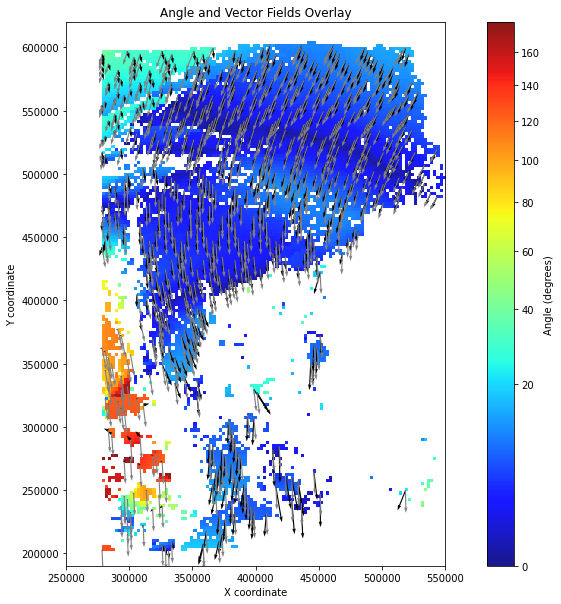

In [294]:
from matplotlib.colors import PowerNorm
plt.figure(figsize=(15, 10))
plt.imshow(masked_angles_field, cmap='jet', norm=PowerNorm(gamma=0.5), origin='lower', extent=[X_subset.min(), X_subset.max(), Y_subset.min(), Y_subset.max()], alpha=0.9)
plt.colorbar(label='Angle (degrees)')

plt.quiver(X_subset[gpi_1416_02][::step], Y_subset[gpi_1416_02][::step], 
           upm[gpi_1416_02][::step], vpm[gpi_1416_02][::step], 
           angles='xy', scale_units='xy', scale=2, color='black',width=0.003)
plt.quiver(X_subset[gpi_1416_02][::step], Y_subset[gpi_1416_02][::step], 
           cum_dx_b_subset[gpi_1416_02][::step], cum_dy_b_subset[gpi_1416_02][::step], 
           angles='xy', scale_units='xy', scale=2, color='grey',width=0.003)


# Setting plot limits and labels
plt.xlim([250000, 550000]) 
plt.ylim([190000, 620000])
#plt.legend()
plt.title('Angle and Vector Fields Overlay')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()
